In [11]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import seaborn as sns

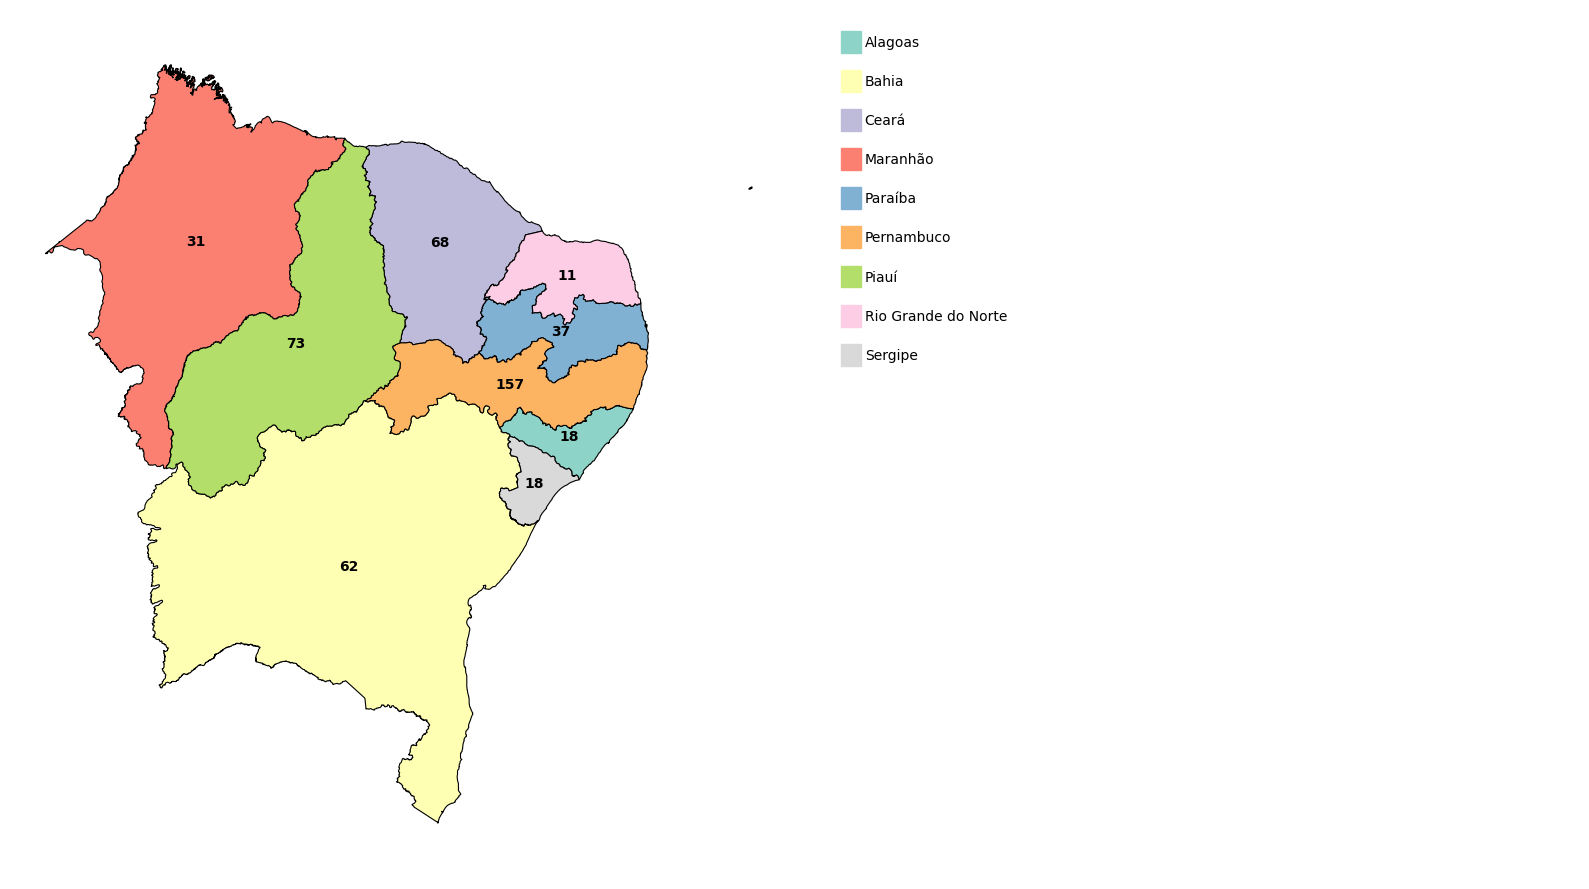

In [ ]:
df = pd.read_csv('./data/completed/brazilian_ne_annotated_humorous_texts.csv')

state_counts = df['brazilian_state'].value_counts().reset_index()
state_counts.columns = ['brazilian_state', 'annotation_count']

northeast_states = [
    'Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba',
    'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe'
]

state_counts = state_counts[state_counts['brazilian_state'].isin(northeast_states)]

states = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

northeast_map = states[states['name'].isin(northeast_states)].copy()

northeast_map = northeast_map.merge(state_counts, left_on='name', right_on='brazilian_state')

palette = sns.color_palette("Set3", len(northeast_map))
state_colors = {state: mcolors.to_hex(palette[i]) for i, state in enumerate(northeast_map['name'])}
northeast_map['color'] = northeast_map['name'].map(state_colors)

fig, ax = plt.subplots(1, 2, figsize=(16, 9))

northeast_map.plot(
    ax=ax[0],
    color=northeast_map['color'],
    edgecolor='black',
    linewidth=0.8
)

for idx, row in northeast_map.iterrows():
    centroid = row['geometry'].centroid
    ax[0].text(centroid.x, centroid.y, str(row['annotation_count']),
               fontsize=10, ha='center', va='center', color='black', weight='bold')

ax[0].axis('off')
ax[1].axis('off')
legend_table = pd.DataFrame({
    'State': northeast_map['name'],
    'Color': northeast_map['color']
}).sort_values('State').reset_index(drop=True)

box_width = 0.025
box_height = 0.025
start_y = 0.95
line_spacing = 0.045

for i, row in legend_table.iterrows():
    y = start_y - i * line_spacing
    ax[1].add_patch(mpatches.Rectangle((0.05, y), box_width, box_height,
                                       color=row['Color'], transform=ax[1].transAxes, clip_on=False))
    ax[1].text(0.08, y + box_height / 2, row['State'],
               transform=ax[1].transAxes, fontsize=10, va='center')

plt.savefig('northeastern_map_highres.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [13]:
df['specific_contexts'].count()

np.int64(179)

In [18]:
df_limpas = df.copy()
df_limpas['publish_date_clean'] = df_limpas['publish_date'].str.replace('(?i)premiered ', '', regex=True)
df_limpas = df_limpas.dropna(subset=['publish_date_clean'])
df_limpas['publish_date_clean'] = pd.to_datetime(df_limpas['publish_date_clean'], errors='coerce')
df_limpas = df_limpas.dropna(subset=['publish_date_clean'])
df_limpas = df_limpas.sort_values('publish_date_clean')

In [ ]:
df_limpas['publish_date'].min()

'Apr 10, 2022'

In [20]:
df_limpas['publish_date'].max()

'Sep 9, 2024'